<a href="https://colab.research.google.com/github/JyotikaUppar/CodSoft/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : Jyotika Uppar


Batch name : B52



Domain: Data Science



##importing the Python Library

In [ ]:


# NumPy is used for numerical operations, arrays, and mathematical functions
import numpy as np

# Pandas is used for handling and analyzing structured data (DataFrames, CSVs, Excel, etc.)
import pandas as pd

# Matplotlib is used for creating basic plots, graphs, and visualizations
import matplotlib.pyplot as plt

# Seaborn is built on top of Matplotlib and is used for advanced, beautiful, and statistical plots
import seaborn as sns

# Warnings module is used to control warning messages
import warnings

# Ignore all warning messages to keep the output clean
warnings.filterwarnings('ignore')

# train_test_split is used to split data into training and testing sets for machine learning
from sklearn.model_selection import train_test_split

# LogisticRegression is a machine learning algorithm used for binary/multiclass classification
from sklearn.linear_model import LogisticRegression

#accuracy_score is used to evaluate how well a model's predictions match the true labels
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import files
upload = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


## Data collection and preprocessing


In [ ]:
#load the data from csv file to pandas data frame
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')
#printing the first 5 row
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Printing the number of row and columns
titanic_data.shape

(891, 12)

In [ ]:
#getting information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Check for missing (NaN) values in each column of the Titanic dataset
# isnull() → marks missing values as True
# sum() → counts total missing values per column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#drop the cabin column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
#replacing the missing values in the age colums with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
#Finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
#replacing the missing value in Embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
#checking for missing values Again
# Check for missing (NaN) values in each column of the Titanic dataset
# isnull() → marks missing values as True
# sum() → counts total missing values per column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Data Analysis


In [ ]:
#getting some statical measure about the data
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Finding the number of people servived and not survived


In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


The Data Visualization Step


In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

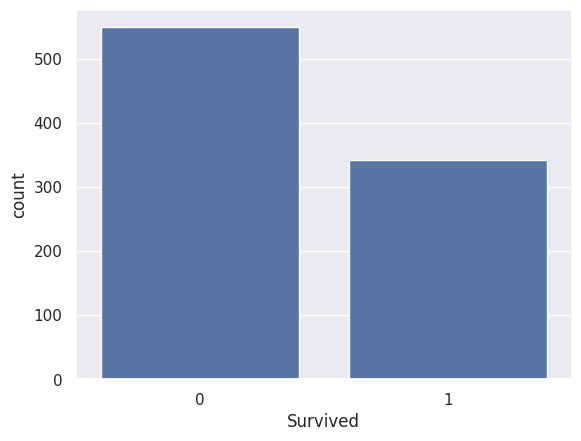

In [ ]:
#making a count plot for survived column
sns.countplot(x='Survived', data = titanic_data)


In [ ]:
#counting the data
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

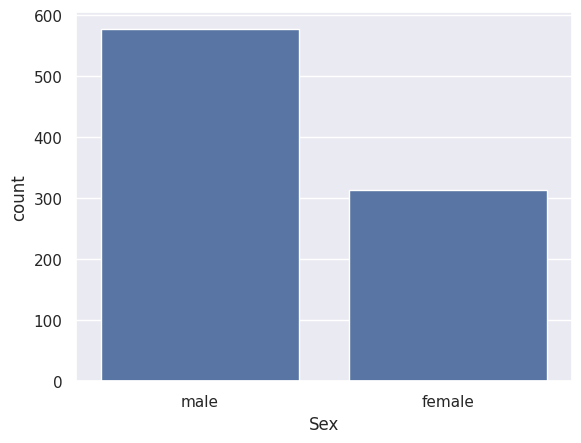

In [ ]:

sns.countplot(x='Sex', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

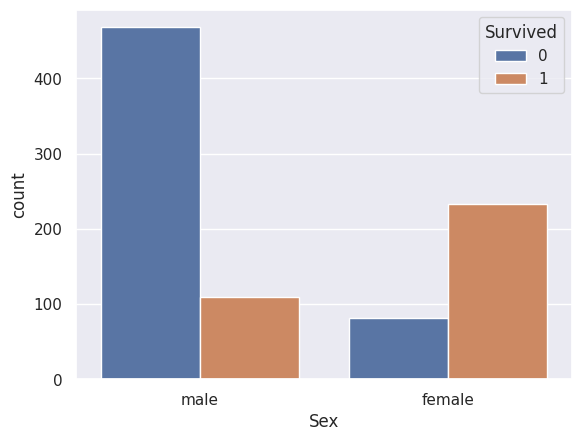

In [ ]:
#number of surviver Gender based
sns.countplot(x='Sex', hue='Survived', data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

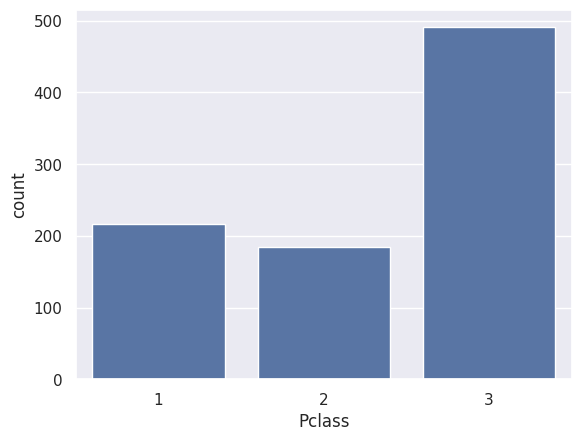

In [ ]:
#based on pclass
sns.countplot(x='Pclass', data = titanic_data)


<Axes: xlabel='Pclass', ylabel='count'>

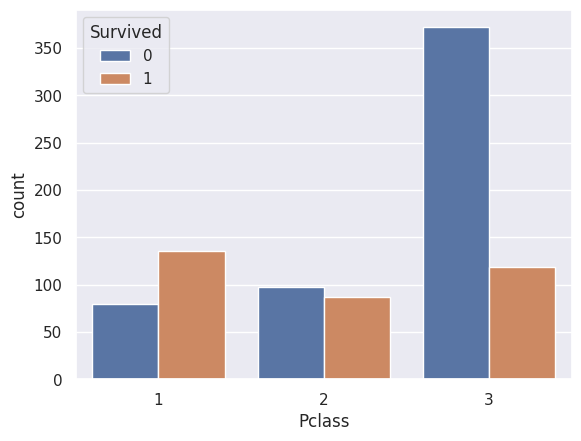

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data = titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

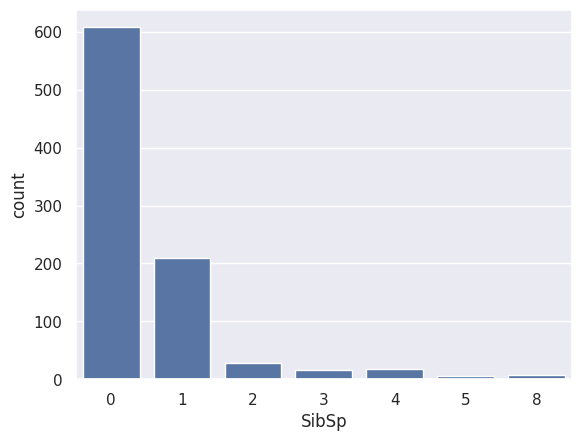

In [ ]:
#based on SibSp
sns.countplot(x='SibSp', data = titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

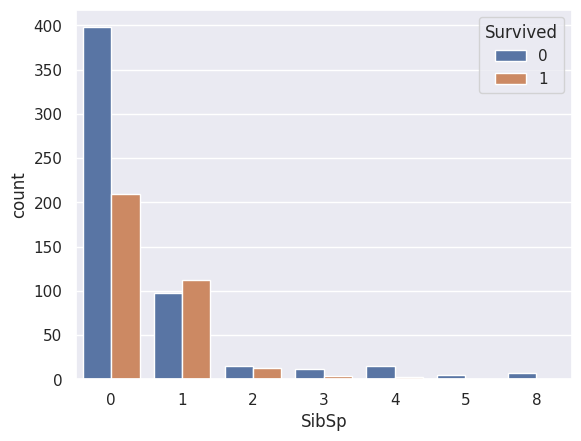

In [ ]:
sns.countplot(x='SibSp', hue='Survived', data = titanic_data)

<Axes: xlabel='Parch', ylabel='count'>

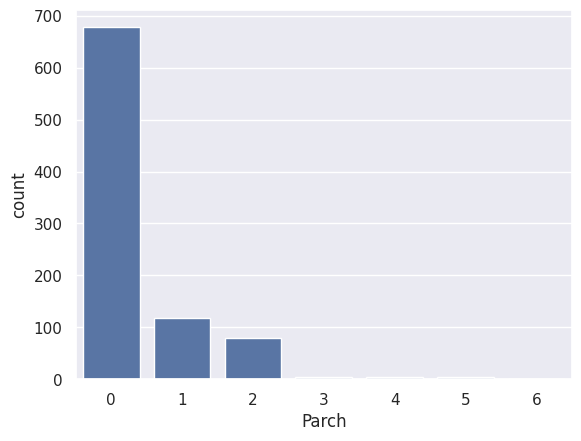

In [ ]:
#based on parch
sns.countplot(x='Parch', data = titanic_data)

<Axes: xlabel='Parch', ylabel='count'>

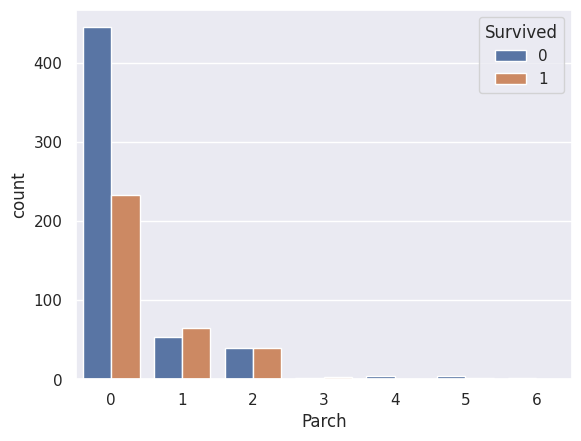

In [ ]:
sns.countplot(x='Parch', hue='Survived', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

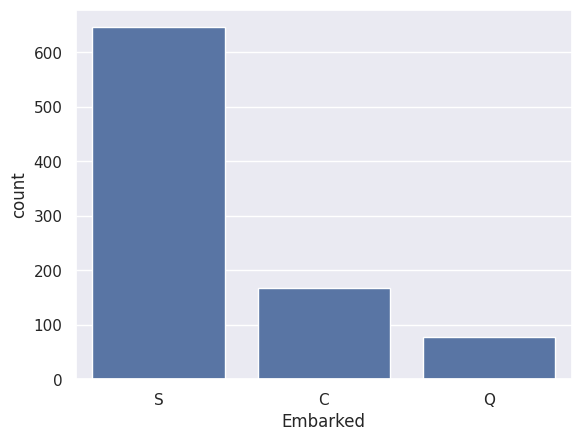

In [ ]:
#based on Embarked
sns.countplot(x='Embarked', data = titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

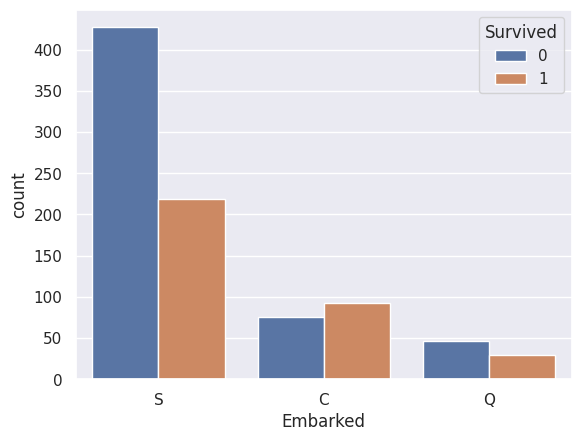

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data = titanic_data)

#      ======== FEATURE ENGINEERING ========

In [ ]:
#FamilySie = number of siblings/spouses + number of parents/childern + self
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1


In [ ]:
#IsAlone = 1 if familySize == 1, else 0
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1

In [ ]:
# Extract Title from the "Name" column (e.g., Mr., Mrs., Miss.)
# str.extract() uses regex to capture text before a dot (.)
titanic_data['Title'] = titanic_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Group rare titles into a single category "Rare"
# Example: Lady, Countess, Capt → Rare
titanic_data['Title'] = titanic_data['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)

# Standardize similar titles:
# 'Mlle' and 'Ms' → 'Miss'
titanic_data['Title'] = titanic_data['Title'].replace(['Mlle', 'Ms'], 'Miss')

# 'Mme' → 'Mrs'
titanic_data['Title'] = titanic_data['Title'].replace('Mme', 'Mrs')

# Create Age Bins (categorical groups for Age)
# pd.cut() splits continuous values into intervals
# Labels: Child (0–18), Young Adult (19–25), Adult (26–35), Middle-Aged (36–60), Senior (61–100)
titanic_data['AgeGroup'] = pd.cut(
    titanic_data['Age'],
    bins=[0, 18, 25, 35, 60, 100],
    labels=['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)

# Display a preview of selected columns
print(titanic_data[['FamilySize','IsAlone','Title','AgeGroup']].head())


   FamilySize  IsAlone Title     AgeGroup
0           2        0    Mr  Young Adult
1           2        0   Mrs  Middle-Aged
2           1        1  Miss        Adult
3           2        0   Mrs        Adult
4           1        1    Mr        Adult


##Encoding the Categorical columns
as we cannot give words directly to Machine learning model we will change it in 0,1 for eg female=1,male=0

In [ ]:
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns (ignore if already missing)
titanic_data = titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, errors='ignore')

# One-hot encode categorical columns
titanic_data = pd.get_dummies(titanic_data, drop_first=True)

# Define features and target
X = titanic_data.drop('Survived', axis=1)
Y = titanic_data['Survived']


In [ ]:
#handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Middle-Aged,AgeGroup_Senior
0,0,3,22.0,1,0,7.2500,2,0,True,False,True,False,True,False,False,True,False,False,False
1,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False,True,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True,True,False,False,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,2,0,False,False,True,False,False,True,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,1,True,False,True,False,True,False,False,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X = titanic_data.drop('Survived',axis=1)
Y =titanic_data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
#converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
#seprating features & Target
X = titanic_data.drop(columns = ['Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass        Age  SibSp  Parch     Fare  FamilySize  IsAlone  Sex_male  \
0         3  22.000000      1      0   7.2500           2        0      True   
1         1  38.000000      1      0  71.2833           2        0     False   
2         3  26.000000      0      0   7.9250           1        1     False   
3         1  35.000000      1      0  53.1000           2        0     False   
4         3  35.000000      0      0   8.0500           1        1      True   
..      ...        ...    ...    ...      ...         ...      ...       ...   
886       2  27.000000      0      0  13.0000           1        1      True   
887       1  19.000000      0      0  30.0000           1        1     False   
888       3  29.699118      1      2  23.4500           4        0     False   
889       1  26.000000      0      0  30.0000           1        1      True   
890       3  32.000000      0      0   7.7500           1        1      True   

     Embarked_Q  Embarked_S  Title_Miss

In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
#spliting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 18) (712, 18) (179, 18)


In [ ]:
# SVC = Support Vector Classifier
# A powerful algorithm that tries to find the best boundary (hyperplane)
# to separate different classes. Works well for classification problems.
from sklearn.svm import SVC

# KNeighborsClassifier = K-Nearest Neighbors
# Classifies data points based on the majority class of their "k" nearest neighbors.
# Simple and intuitive, but can be slow with large datasets.
from sklearn.neighbors import KNeighborsClassifier

# DecisionTreeClassifier
# Creates a tree-like structure where decisions are made based on feature conditions.
# Easy to visualize and interpret, but can overfit if not controlled.
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier
# An ensemble of multiple decision trees.
# Combines their results ("voting") to improve accuracy and reduce overfitting.
from sklearn.ensemble import RandomForestClassifier

# (Duplicate import of KNeighborsClassifier — this line is not needed)
# You can remove this, since it's already imported above.
# from sklearn.neighbors import KNeighborsClassifier

# GradientBoostingClassifier
# An ensemble technique that builds trees sequentially,
# where each new tree corrects errors of the previous ones.
# Very powerful and often used in Kaggle competitions.
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=3, stratify=Y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    results[name] = model.score(X_test, Y_test)

results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
display(results_df.sort_values(by="Accuracy", ascending=False))


,Accuracy
Random Forest,0.871508
Gradient Boosting,0.860335
Logistic Regression,0.832402
Decision Tree,0.821229
K-Nearest Neighbors,0.737430
Support Vector Classifier,0.709497


#Cross Validation
A single train-test split can be biased Cross Validtion helps show your model performance is generalizablw


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, Y, cv=5, scoring="accuracy")
print("Random forest :", scores.mean())
print("CV Score" ,scores)


Random forest : 0.8080785889146946
CV Score [0.81005587 0.79213483 0.84831461 0.75842697 0.83146067]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(random_forest_model, X, Y, cv=5)
print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [0.81005587 0.79213483 0.84269663 0.76404494 0.83707865]


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
random_forest_model.fit(X_train, Y_train)
Y_pred = random_forest_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.82      0.84      0.83        69

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

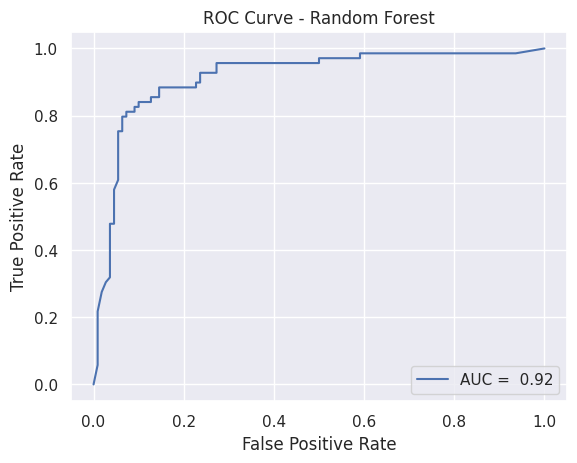

In [ ]:
Y_proba = random_forest_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
auc_score = roc_auc_score(Y_test, Y_proba) # Calculate AUC score

plt.plot(fpr, tpr, label = f"AUC = {auc_score : .2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [ ]:
# Model Training
model = LogisticRegression()
#traing the logistic regression with model training data
model.fit(X_train, Y_train)


LogisticRegression()

model Evaluation


In [ ]:
#accuracy score
#accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


[1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

[0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1]
Accuracy score of test data :  0.8268156424581006


In [ ]:
#Example result table you can fill from experiments
import pandas as pd
summary = {
    "Model": ["Logistic Regression", "Random Forest", ],
    "Befor FE Accuraccy": [0.71,0.82],
    "after FE Acurraccy" : [0.81,0.83]
}

**Objective:**


Predict whether a passenger survived the Titanic disaster using passenger data such as age, gender, class, and fare.



**Approach / Methodology:**

Performed data cleaning: handled missing values, encoded categorical variables, and scaled numerical features.

Conducted exploratory data analysis (EDA) to find patterns and important features affecting survival.




**Built multiple classification models:**


 Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors.

Evaluated models using accuracy and confusion matrix to select the best-performing model.

**Tools / Technologies:**


Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Googlecolab Notebook

**Results / Outcome:**

Achieved **82%** accuracy with the Random Forest model.

**Identified key factors influencing survival:** gender, passenger class, age, and family size.

Documented workflow and results in the Google colab notebook with visualizations.